# Taipei MRT

It was a sudden moment that I wanted to know if I took Taipei MRT from A station to B station what is the shortest route, and how long will it cost? In this notebook, I will create a function that the inputs are stations A and B, and the outputs are its shortest routes (including transfer) and the cost time.

## Data

The data is coming from https://data.taipei/dataset/detail?id=513e97fe-6a98-4a0d-b7dc-11122c8638d4.  
Include the line of the MRT, the traveltime from station A to station B, and the stoptime of station B.   
The time unit is sec.

In [1]:
import pandas as pd

mrt_data = pd.read_csv('./臺北捷運相鄰兩站間之行駛時間及停靠站時間.csv', encoding='big5')
mrt_data

,SeqNo,stationbus,stationA,stationB,traveltime,SeqNo.1,stoptime
0,1,淡水-象山,捷運淡水站,捷運紅樹林站,175,1,0
1,2,淡水-象山,捷運紅樹林站,捷運竹圍站,138,2,25
2,3,淡水-象山,捷運竹圍站,捷運關渡站,148,3,25
3,4,淡水-象山,捷運關渡站,捷運忠義站,80,4,25
4,5,淡水-象山,捷運忠義站,捷運復興崗站,112,5,25
...,...,...,...,...,...,...,...
181,182,新北產業園區-大坪林,捷運中和站,捷運景安站,194,9,25
182,183,新北產業園區-大坪林,捷運景安站,捷運景平站,84,10,35
183,184,新北產業園區-大坪林,捷運景平站,捷運秀朗橋站,79,11,25
184,185,新北產業園區-大坪林,捷運秀朗橋站,捷運十四張站,111,12,23


Only keep station name (remove 站 but keep 車站)

In [2]:
import re

mrt_data[['stationA', 'stationB']] = mrt_data[['stationA', 'stationB']].map(lambda x: re.sub('車站', '車戰', x))
mrt_data[['stationA', 'stationB']] = mrt_data[['stationA', 'stationB']].map(lambda x: re.sub('捷運|站', '', x))
mrt_data[['stationA', 'stationB']] = mrt_data[['stationA', 'stationB']].map(lambda x: re.sub('戰', '站', x))
mrt_data

,SeqNo,stationbus,stationA,stationB,traveltime,SeqNo.1,stoptime
0,1,淡水-象山,淡水,紅樹林,175,1,0
1,2,淡水-象山,紅樹林,竹圍,138,2,25
2,3,淡水-象山,竹圍,關渡,148,3,25
3,4,淡水-象山,關渡,忠義,80,4,25
4,5,淡水-象山,忠義,復興崗,112,5,25
...,...,...,...,...,...,...,...
181,182,新北產業園區-大坪林,中和,景安,194,9,25
182,183,新北產業園區-大坪林,景安,景平,84,10,35
183,184,新北產業園區-大坪林,景平,秀朗橋,79,11,25
184,185,新北產業園區-大坪林,秀朗橋,十四張,111,12,23


### Remove 0 Stoptime Stations

When I explored the data, I found some stations that are both middle stations and terminals at the same time. To process this situation, remove the 0 stoptime record when it is also a middle station.

In [3]:
zero_stoptime = mrt_data.loc[mrt_data['stoptime'] == 0]
zero_stoptime

,SeqNo,stationbus,stationA,stationB,traveltime,SeqNo.1,stoptime
0,1,淡水-象山,淡水,紅樹林,175,1,0
26,27,北投-大安,北投,奇岩,91,1,0
43,44,松山-新店,松山,南京三民,138,1,0
61,62,松山-台電大樓,松山,南京三民,138,1,0
72,73,七張-小碧潭,七張,小碧潭,203,1,0
73,74,北投-新北投,北投,新北投,157,1,0
74,75,南港展覽館-頂埔,南港展覽館,南港,112,1,0
96,97,南港展覽館-亞東醫院,南港展覽館,南港,112,1,0
114,115,動物園-南港展覽館,南港展覽館,南港軟體園區,78,1,0
137,138,南勢角-蘆洲,蘆洲,三民高中,111,1,0


In [4]:
middle_station = mrt_data.loc[mrt_data['stationA'].isin(zero_stoptime['stationA']) & (mrt_data['stoptime'] != 0)]
middle_station

,SeqNo,stationbus,stationA,stationB,traveltime,SeqNo.1,stoptime
6,7,淡水-象山,北投,奇岩,91,7,28
59,60,松山-新店,七張,新店區公所,81,17,24


In [5]:
remove_records = mrt_data.loc[(mrt_data['stationA'].isin(middle_station['stationA'])) & (mrt_data['stoptime'] == 0)]
remove_records

,SeqNo,stationbus,stationA,stationB,traveltime,SeqNo.1,stoptime
26,27,北投-大安,北投,奇岩,91,1,0
72,73,七張-小碧潭,七張,小碧潭,203,1,0
73,74,北投-新北投,北投,新北投,157,1,0


In [6]:
mrt_data = mrt_data.loc[~mrt_data.index.isin(remove_records.index)].reset_index(drop=True)
mrt_data

,SeqNo,stationbus,stationA,stationB,traveltime,SeqNo.1,stoptime
0,1,淡水-象山,淡水,紅樹林,175,1,0
1,2,淡水-象山,紅樹林,竹圍,138,2,25
2,3,淡水-象山,竹圍,關渡,148,3,25
3,4,淡水-象山,關渡,忠義,80,4,25
4,5,淡水-象山,忠義,復興崗,112,5,25
...,...,...,...,...,...,...,...
178,182,新北產業園區-大坪林,中和,景安,194,9,25
179,183,新北產業園區-大坪林,景安,景平,84,10,35
180,184,新北產業園區-大坪林,景平,秀朗橋,79,11,25
181,185,新北產業園區-大坪林,秀朗橋,十四張,111,12,23


## Station Connections

Build a dictionary whose keys are station names. Each key has its sub-dictionaries. The keys of the sub-dictionaries are all neighbor stations of the parent key. A sub-key contains the travel time from the parent key to the sub-key and the stop time of the parent key.

In [7]:
from collections import defaultdict

def station_connection(data):
    station = defaultdict(lambda : defaultdict(dict))
    for i in range(0, len(data)):
        station1 = data.loc[i, 'stationA']
        station2 = data.loc[i, 'stationB']
        traveltime = data.at[i, 'traveltime'].item()
        stoptime = data.at[i, 'stoptime'].item()
        line = data.at[i, 'stationbus']
        station[station1][station2]['traveltime'] = traveltime
        station[station1][station2]['stoptime'] = stoptime
        station[station2][station1]['traveltime'] = traveltime
        try:
            station[station2][station1]['stoptime'] = data.loc[(data['stationbus']==line) & (data['stationA'] == station2), 'stoptime'].item()
        except:
            station[station2][station1]['stoptime'] = 0
    return station

station = station_connection(mrt_data)
station['台北車站']

defaultdict(dict,
            {'中山': {'traveltime': 68, 'stoptime': 35},
             '台大醫院': {'traveltime': 67, 'stoptime': 35},
             '善導寺': {'traveltime': 66, 'stoptime': 42},
             '西門': {'traveltime': 120, 'stoptime': 42}})

## Transfer

Transfer means you must change the MRT line to reach your destination.  
Here, we will create a dictionary that stores what lines pass through the station.

In [8]:
def transit_station(data):  
    line = pd.concat([data[['stationbus', 'stationA', 'stationB']].rename(columns={'stationbus':'line', 'stationA':'from', 'stationB':'to'}), data[['stationbus', 'stationB', 'stationA']].rename(columns={'stationbus':'line', 'stationA':'to', 'stationB':'from'})])
    line = line.drop_duplicates()
    line = line.groupby('from').line.unique().to_dict()
    return line

line = transit_station(mrt_data)
line['台北車站']

array(['淡水-象山', '北投-大安', '南港展覽館-頂埔', '南港展覽館-亞東醫院'], dtype=object)

## The Best Route and Travel Time

Any transfer would be marked as `換線` in the route and add 5 min to the travel time.   
The outputs of the function are route and travel time(min).

In [9]:
# if change line return 1 else return 0
def change_line(data, stationA, stationB, stationC):
    same_line = data[stationB][[i in data[stationA] for i in data[stationB]]]
    if any([i in data[stationC] for i in same_line]):
        return 0
    else:
        return 1

# calculate the shortest travel route
def bfs(place, destination, route, been_place, total_time):
    # 換線 +5 min
    tmp_place = []
    tmp_route = []
    tmp_been_place = been_place.copy()
    tmp_total_time = []
    min_trip = {}
    for p, r, t in zip(place, route, total_time):
        for next_place in station[p]:
            if next_place in been_place:
                continue
            if len(r) > 1:
                tmp_change_line = change_line(line, r[-1] ,r[-2], next_place) if r[-2]!='換線' else change_line(line, r[-1] ,r[-3], next_place)
            else:
                tmp_change_line = 0
            if next_place == destination:
                min_trip[(t + station[p][next_place]['traveltime']) / 60 + tmp_change_line * 5] = (r + [next_place]) if not tmp_change_line else (r + ['換線', next_place])
            tmp_been_place.add(next_place)
            tmp_place.append(next_place)
            if tmp_change_line:
                tmp_route.append(r + ['換線', next_place])
            else:
                tmp_route.append(r + [next_place])
            tmp_total_time.append(t + station[p][next_place]['traveltime'] + station[p][next_place]['stoptime'] + tmp_change_line * 300)
    if len(min_trip) != 0:
        return min_trip[min(min_trip.keys())] , min(min_trip.keys())
    answer_route, answer_time = bfs(tmp_place, destination, tmp_route, tmp_been_place, tmp_total_time)
    if answer_route:
        return answer_route, answer_time
    return None, None

def find_route(place, destination):
    return bfs([place], destination, [[place]], set([place]), [0])

In [10]:
print(find_route('中山', '動物園'))

(['中山', '松江南京', '南京復興', '換線', '忠孝復興', '大安', '科技大樓', '六張犁', '麟光', '辛亥', '萬芳醫院', '萬芳社區', '木柵', '動物園'], 28.033333333333335)


### The Shortest Travel Time of All Stations

Calculate the shortest travel time of all combinations of stations.

In [11]:
def estimate_all_routes():
    travel_route = pd.DataFrame()
    for i in station.keys():
        for k in station.keys():
            if i == k:
                continue
            r, t = bfs([i], k, [[i]], set([i]), [0])
            travel_route = pd.concat([travel_route, pd.DataFrame([[i, k, r, t]])])

    travel_route.columns = ['from', 'to', 'route', 'time']
    travel_route['time'] = travel_route['time'].apply(lambda x: round(x, 2))
    travel_route = travel_route.reset_index(drop=True)
    travel_route['direction'] = travel_route['route'].apply(lambda x: '->'.join(x))
    return travel_route
    
all_travel_time = estimate_all_routes()
all_travel_time

,from,to,route,time,direction
0,淡水,紅樹林,"[淡水, 紅樹林]",2.92,淡水->紅樹林
1,淡水,竹圍,"[淡水, 紅樹林, 竹圍]",5.22,淡水->紅樹林->竹圍
2,淡水,關渡,"[淡水, 紅樹林, 竹圍, 關渡]",8.10,淡水->紅樹林->竹圍->關渡
3,淡水,忠義,"[淡水, 紅樹林, 竹圍, 關渡, 忠義]",9.85,淡水->紅樹林->竹圍->關渡->忠義
4,淡水,復興崗,"[淡水, 紅樹林, 竹圍, 關渡, 忠義, 復興崗]",12.13,淡水->紅樹林->竹圍->關渡->忠義->復興崗
...,...,...,...,...,...
13335,十四張,中原,"[十四張, 秀朗橋, 景平, 景安, 中和, 橋和, 中原]",12.92,十四張->秀朗橋->景平->景安->中和->橋和->中原
13336,十四張,橋和,"[十四張, 秀朗橋, 景平, 景安, 中和, 橋和]",11.30,十四張->秀朗橋->景平->景安->中和->橋和
13337,十四張,中和,"[十四張, 秀朗橋, 景平, 景安, 中和]",8.98,十四張->秀朗橋->景平->景安->中和
13338,十四張,景平,"[十四張, 秀朗橋, 景平]",3.55,十四張->秀朗橋->景平


### Stations Pivot Table

In [12]:
all_travel_time.pivot_table(index='from', columns='to', values='time')

to,七張,三和國中,三民高中,三重,三重國小,中原,中和,中山,中山國中,中山國小,...,輔大,辛亥,迴龍,關渡,雙連,頂埔,頂溪,頭前庄,麟光,龍山寺
from,,,,,,,,,,,,,,,,,,,,,
七張,NaN,37.57,41.30,43.92,35.35,22.03,18.10,23.08,38.60,28.88,...,43.60,41.53,49.12,50.25,24.70,46.45,19.43,33.92,39.05,23.88
三和國中,38.05,NaN,3.32,16.12,1.78,38.17,37.62,14.37,25.63,7.97,...,25.80,36.12,31.32,35.38,12.77,51.87,24.65,21.12,33.63,25.97
三民高中,41.78,3.32,NaN,19.85,5.52,41.90,41.35,18.10,29.37,11.70,...,29.53,39.85,35.05,39.12,16.50,55.60,28.38,24.85,37.37,29.70
三重,44.52,16.12,19.85,NaN,13.90,21.63,25.40,15.62,26.88,9.22,...,9.27,37.37,14.78,36.63,14.02,35.33,25.90,4.58,34.88,28.77
三重國小,35.85,1.78,5.52,13.92,NaN,35.97,35.42,12.17,23.43,5.77,...,23.60,33.92,29.12,33.18,10.57,49.67,22.45,18.92,31.43,23.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
頂埔,46.28,51.10,54.83,34.57,48.88,23.40,27.17,32.03,43.28,41.78,...,34.25,46.28,39.77,59.20,33.65,NaN,39.92,24.57,43.80,20.53
頂溪,20.12,24.85,28.58,26.10,22.63,16.35,12.42,19.53,25.88,16.17,...,37.92,28.82,43.43,46.98,21.98,40.77,NaN,28.23,26.33,21.17
頭前庄,34.52,21.12,24.85,4.58,18.90,11.63,15.40,20.62,31.88,14.22,...,4.27,44.52,9.78,41.63,19.02,25.33,28.15,NaN,42.03,18.77


### The top 10 farthest route (longest travel time)

In [13]:
all_travel_time.sort_values('time', ascending=False).head(10)

,from,to,route,time,direction
64,淡水,南港軟體園區,"[淡水, 紅樹林, 竹圍, 關渡, 忠義, 復興崗, 北投, 奇岩, 唭哩岸, 石牌, 明德...",74.23,淡水->紅樹林->竹圍->關渡->忠義->復興崗->北投->奇岩->唭哩岸->石牌->明德-...
7475,南港軟體園區,淡水,"[南港軟體園區, 南港展覽館, 換線, 南港, 昆陽, 後山埤, 永春, 市政府, 國父紀念...",74.22,南港軟體園區->南港展覽館->換線->南港->昆陽->後山埤->永春->市政府->國父紀念館...
7590,東湖,淡水,"[東湖, 葫洲, 大湖公園, 內湖, 文德, 港墘, 西湖, 劍南路, 大直, 松山機場, ...",72.50,東湖->葫洲->大湖公園->內湖->文德->港墘->西湖->劍南路->大直->松山機場->中...
65,淡水,東湖,"[淡水, 紅樹林, 竹圍, 關渡, 忠義, 復興崗, 北投, 奇岩, 唭哩岸, 石牌, 明德...",72.15,淡水->紅樹林->竹圍->關渡->忠義->復興崗->北投->奇岩->唭哩岸->石牌->明德-...
179,紅樹林,南港軟體園區,"[紅樹林, 竹圍, 關渡, 忠義, 復興崗, 北投, 奇岩, 唭哩岸, 石牌, 明德, 芝山...",71.32,紅樹林->竹圍->關渡->忠義->復興崗->北投->奇岩->唭哩岸->石牌->明德->芝山-...
7476,南港軟體園區,紅樹林,"[南港軟體園區, 南港展覽館, 換線, 南港, 昆陽, 後山埤, 永春, 市政府, 國父紀念...",70.88,南港軟體園區->南港展覽館->換線->南港->昆陽->後山埤->永春->市政府->國父紀念館...
7705,葫洲,淡水,"[葫洲, 大湖公園, 內湖, 文德, 港墘, 西湖, 劍南路, 大直, 松山機場, 中山國中...",70.78,葫洲->大湖公園->內湖->文德->港墘->西湖->劍南路->大直->松山機場->中山國中-...
66,淡水,葫洲,"[淡水, 紅樹林, 竹圍, 關渡, 忠義, 復興崗, 北投, 奇岩, 唭哩岸, 石牌, 明德...",70.43,淡水->紅樹林->竹圍->關渡->忠義->復興崗->北投->奇岩->唭哩岸->石牌->明德-...
180,紅樹林,東湖,"[紅樹林, 竹圍, 關渡, 忠義, 復興崗, 北投, 奇岩, 唭哩岸, 石牌, 明德, 芝山...",69.23,紅樹林->竹圍->關渡->忠義->復興崗->北投->奇岩->唭哩岸->石牌->明德->芝山-...
7591,東湖,紅樹林,"[東湖, 葫洲, 大湖公園, 內湖, 文德, 港墘, 西湖, 劍南路, 大直, 松山機場, ...",69.17,東湖->葫洲->大湖公園->內湖->文德->港墘->西湖->劍南路->大直->松山機場->中...


### The most transfers route

In [14]:
print(f"transfter time: {max(all_travel_time['route'].apply(lambda x: x.count('換線')))}")
print(f"{len(all_travel_time.loc[all_travel_time['route'].apply(lambda x: x.count('換線'))[lambda x: x == 4].index].sort_values('time', ascending=False))} routes")
all_travel_time.loc[all_travel_time['route'].apply(lambda x: x.count('換線'))[lambda x: x == 4].index].sort_values('time', ascending=False).head(5)

transfter time: 4
46 routes


,from,to,route,time,direction
11181,迴龍,象山,"[迴龍, 丹鳳, 輔大, 新莊, 頭前庄, 換線, 新埔民生, 板橋, 換線, 新埔, 江子...",62.18,迴龍->丹鳳->輔大->新莊->頭前庄->換線->新埔民生->板橋->換線->新埔->江子翠...
3086,象山,迴龍,"[象山, 台北101/世貿, 信義安和, 大安, 換線, 忠孝復興, 換線, 忠孝新生, 善...",62.08,象山->台北101/世貿->信義安和->大安->換線->忠孝復興->換線->忠孝新生->善導...
2971,台北101/世貿,迴龍,"[台北101/世貿, 信義安和, 大安, 換線, 忠孝復興, 換線, 忠孝新生, 善導寺, ...",60.53,台北101/世貿->信義安和->大安->換線->忠孝復興->換線->忠孝新生->善導寺->台...
11180,迴龍,台北101/世貿,"[迴龍, 丹鳳, 輔大, 新莊, 頭前庄, 換線, 新埔民生, 板橋, 換線, 新埔, 江子...",60.20,迴龍->丹鳳->輔大->新莊->頭前庄->換線->新埔民生->板橋->換線->新埔->江子翠...
11296,丹鳳,象山,"[丹鳳, 輔大, 新莊, 頭前庄, 換線, 新埔民生, 板橋, 換線, 新埔, 江子翠, 龍...",59.38,丹鳳->輔大->新莊->頭前庄->換線->新埔民生->板橋->換線->新埔->江子翠->龍山...


### Top 10 Shortest Average Travel Time to Other Stations.

If you are looking for a place which is the most convenient to other places, consider the following options:

In [15]:
all_travel_time.groupby('from').time.mean().sort_values().to_frame().head(10)

,time
from,
忠孝新生,18.562783
松江南京,18.585217
台北車站,18.684348
中山,19.204957
西門,19.432087
民權西路,19.998870
南京復興,20.038522
忠孝復興,20.489565
善導寺,20.579217


### Top 10 farthest average travel time to other stations.

In [16]:
all_travel_time.groupby('from').time.mean().sort_values(ascending=False).to_frame().head(10)

,time
from,
淡水,50.313826
紅樹林,47.422696
竹圍,44.777304
關渡,42.018957
迴龍,40.847391
忠義,40.375478
東湖,39.749043
葫洲,39.740087
頂埔,39.326087


### Average Shortest vs Futherest

<Axes: >

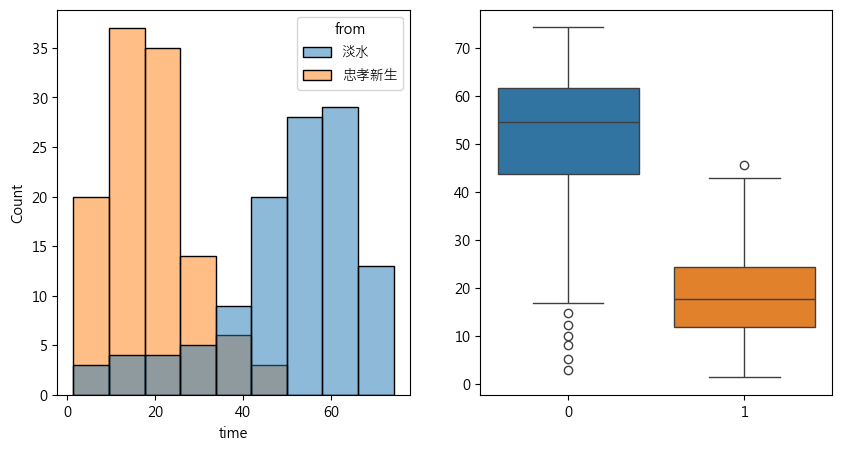

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

vs = all_travel_time.loc[all_travel_time['from'].isin(['忠孝新生', '淡水'])]
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(vs, x='time', hue='from', ax=axes[0])
sns.boxplot([vs.loc[vs['from']=='淡水', 'time'].values, vs.loc[vs['from']=='忠孝新生', 'time'].values], ax=axes[1])